<a href="https://colab.research.google.com/github/saadnajib/Artificial-intelligence/blob/master/Cipher%2010%20dataset%20classification%20for%2010%20classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.models import Model
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [0]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [16]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

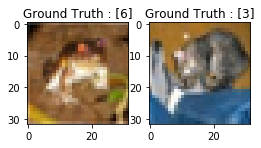

In [46]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [47]:
nRows,nCols,nDims = train_images.shape[1:]

train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)
print(train_images[0].size)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

3072


In [0]:
train_data /= 255
test_data /= 255


train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [49]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',name='conv_1'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [0]:
model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 64)         

In [0]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

scores = model1.evaluate(test_data, test_labels_one_hot, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 90us/step - loss: 2.0715 - acc: 0.2401 - val_loss: 1.7951 - val_acc: 0.3761
Epoch 2/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.7196 - acc: 0.3748 - val_loss: 1.4511 - val_acc: 0.4620
Epoch 3/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.5471 - acc: 0.4387 - val_loss: 1.3672 - val_acc: 0.5080
Epoch 4/100
50000/50000 [==============================] - 4s 72us/step - loss: 1.4005 - acc: 0.4964 - val_loss: 1.3205 - val_acc: 0.5191
Epoch 5/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.2895 - acc: 0.5409 - val_loss: 1.1139 - val_acc: 0.5969
Epoch 6/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.2013 - acc: 0.5747 - val_loss: 1.2735 - val_acc: 0.5409
Epoch 7/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.1197 - acc: 0.6045 - val_loss: 0.9986 - 

In [0]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_data', 'test_data'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_data', 'test_data'], loc='upper left')
plt.show()

In [0]:
model1.save('/content/drive/My Drive/Colab Notebooks/79percentacc_model.h5')

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FC21CE8C780>
float32
(32, 32, 3)
3072
[[1.0035032e-04 4.9642908e-09 8.7061161e-03 2.7585526e-03 8.6538422e-01
  3.2337230e-02 6.2258689e-05 9.0649419e-02 9.6104782e-07 8.7692541e-07]]
4
deer


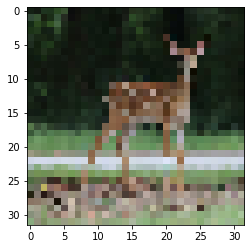

In [61]:
def pdimage(image_path):
  from keras.preprocessing.image import load_img
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing.image import array_to_img
  img = load_img(image_path)
  print(type(img))
  
  #resize
  img=img.resize((32,32))
  plt.imshow(img, cmap='gray')
  print(img)
  fxpic = img_to_array(img)
 
  #details print
  print(fxpic.dtype)
  print(fxpic.shape)
  print(fxpic.size)
  
 #adding 4th dim and converting to float 
 # imagefx = np.expand_dims(fxpic, axis=0)
  fxpic=fxpic.reshape(1,32,32,3)
  fxpic=fxpic.astype('float32')
  fxpic /=255
  mb=model1.predict(fxpic)
  print(mb)
  index_max = np.where(mb == np.amax(mb))
  findex=int(index_max[1])
  print(findex)
  lab=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  a=lab[findex]
  print(a)

pdimage('/content/drive/My Drive/Colab Notebooks/deer.jpg')


In [0]:
model1.predict(fxpic)

array([[0.20037948, 0.1121378 , 0.05806703, 0.1384548 , 0.06207112,
        0.06113269, 0.0547168 , 0.07181831, 0.1008398 , 0.14038217]],
      dtype=float32)

In [0]:
    from keras import backend as K

    input1 = model1.input               # input placeholder

    output1 = [layer.output for layer in model1.layers]# all layer outputs

    fun = K.function([input1, K.learning_phase()],output1)# evaluation function

    # Testing

    t = np.random.random(input_shape)[np.newaxis,...]

    layer_outputs = fun([t, 1.])

    print(layer_outputs)

In [0]:
def visualize_conv_layer(layer_name):
  
  layer_output=model1.get_layer(layer_name).output

  intermediate_model=Model(inputs=model1.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(train_data[0].reshape(1,32,32,3))
  
  row_size=4
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1


(1, 15, 15, 64)


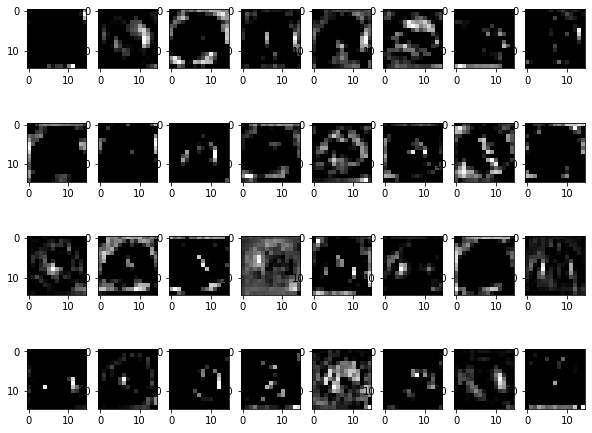

In [0]:
visualize_conv_layer('conv_1')